In [1]:
# !pip install plotly
# !pip install nbformat
# 裝完要重啟kernel，不然會報錯

In [2]:
import pandas as pd
import plotly.express as px

In [3]:
# read the data
data = pd.read_csv('OnlineRetail.csv', encoding='latin-1')
data.shape

(541909, 8)

In [4]:
# 了解資料內容
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [6]:
# 查看缺失值，可以看到CustomerID缺少最多，代表有很多購買是未記名的
# Description有缺失值，但如果不分析要買什麼，可以不用刪除
# 先不刪除任何缺失值，依時間序列，探索每月的銷售額趨勢
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# 轉換時間格式
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [8]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [9]:
# 將數量與單價相乘，計算每筆交易的總金額
data['Amount'] = data['Quantity']*data['UnitPrice']

In [10]:
# 依照時間排序，發現資料只有兩年的時間而已
data = data.sort_values('InvoiceDate')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France,19.80
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France,15.00


<Axes: xlabel='InvoiceDate'>

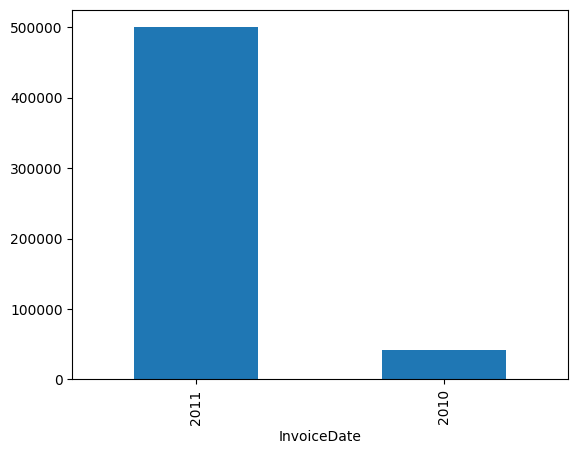

In [11]:
# 資料幾乎都集中在2011年，2010年的資料很少，所以趨勢分析只看2011年
data['InvoiceDate'].dt.year.value_counts().plot(kind='bar')

In [12]:
# 共有多少個國家的交易紀錄
data['Country'].unique()
len(data['Country'].unique())

38

0.839969028686211


<Axes: xlabel='Country'>

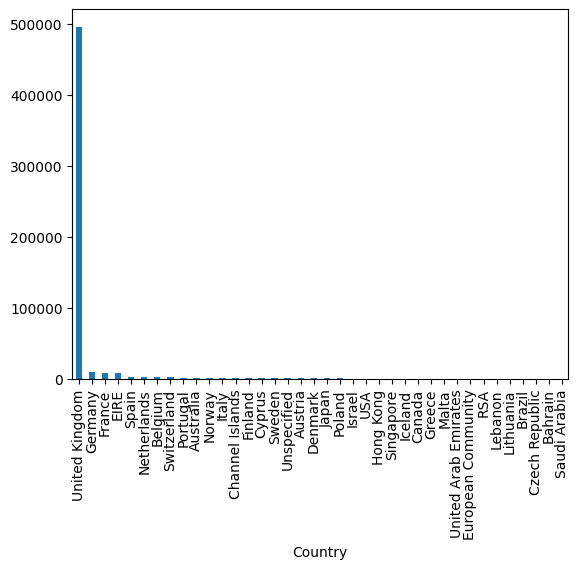

In [13]:
# 英國營業額佔據84%
print(data[data['Country'] == 'United Kingdom']['Amount'].sum() / data['Amount'].sum())

# 資料高度集中在英國，其他國家的資料量很少，所以這間公司應該是英國的公司，並且內銷居多
data['Country'].value_counts().plot(kind='bar')

In [14]:
# 將每月的資料分組，並計算每月的銷售額趨勢，只取2011年的資料
data_2011 = data[data['InvoiceDate'].dt.year == 2011]
month = data_2011.groupby([data['InvoiceDate'].dt.month])

# 用plotly繪圖，X軸為月份，Y軸為銷售額
fig = px.line(month['Amount'].sum(), title='2011年每月銷售額趨勢').update_layout(xaxis_title='月份', yaxis_title='銷售額')
fig.update_layout(xaxis=dict(tickmode='array', tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))
fig.show()

In [15]:
# 看每月的銷售量趨勢，只取2011年的資料
fig = px.line(month['Quantity'].sum(), title='2011年每月銷售量趨勢').update_layout(xaxis_title='月份', yaxis_title='銷售量')
fig.update_layout(xaxis=dict(tickmode='array', tickvals=list(range(1, 13)), ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))
fig.show()

In [16]:
# 依照國家分組，計算每個國家的銷售量
country = data.groupby(['Country'])

fig = px.bar(country['Quantity'].sum().sort_values(ascending=False), title='各國銷售量').update_layout(xaxis_title='國家', yaxis_title='銷售量')
fig.show()

In [17]:
# 找出最暢銷的產品，先計算每個產品的銷售量，再排序
product = data.groupby(['Description'])
product = product['Quantity'].sum().sort_values(ascending=False)

fig = px.bar(product.head(10), title='依"銷售量"排名最暢銷的產品').update_layout(xaxis_title='產品', yaxis_title='銷售量')
fig.show()

In [18]:
# 找出最暢銷的產品，先計算每個產品的銷售額，再排序
product = data.groupby(['Description'])
product = product['Amount'].sum().sort_values(ascending=False)

fig = px.bar(product.head(10), title='依"銷售額"排名最暢銷的產品').update_layout(xaxis_title='產品', yaxis_title='銷售額')
fig.show()

In [19]:
# 交易額前十大客戶

# 把data空值的資料刪除，因為CustomerID有最多空值
data_dropna = data.dropna()
# 將data['CustomerID']轉成字串，並把小數點去掉
data_dropna['CustomerID'] = data_dropna['CustomerID'].astype(str)
data_dropna['CustomerID'] = data_dropna['CustomerID'].str.replace('.0', '')

top_amount_customer = data_dropna.groupby(['CustomerID'])
top_amount_customer = top_amount_customer['Amount'].sum().sort_values(ascending=False).head(10)

fig = px.bar(top_amount_customer, title='交易額前十大客戶').update_layout(xaxis_title='客戶ID', yaxis_title='交易額')
fig.show()

C:\Users\Cooper\AppData\Local\Temp\ipykernel_11060\3493647787.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Cooper\AppData\Local\Temp\ipykernel_11060\3493647787.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
# 購買最多產品的客戶
top_quantity_customer = data_dropna.groupby(['CustomerID'])
top_quantity_customer = top_quantity_customer['Quantity'].sum().sort_values(ascending=False).head(10)

fig = px.bar(top_quantity_customer, title='購買量前十大客戶').update_layout(xaxis_title='客戶ID', yaxis_title='購買量')
fig.show()

In [21]:
# top_quantity_customer, top_amount_customer兩邊都有的客戶，共有9個，代表這9個客戶不只購買量多，交易額也高
top_customer = top_amount_customer.index.intersection(top_quantity_customer.index)
len(top_customer)

9

In [22]:
# 計算退貨率最高的國家，退貨率 = 退貨數量/購買數量
# 先計算每個國家的退貨數量，再計算每個國家的購買數量，最後相除
data_return = data[data['Quantity'] < 0]
return_country = data_return.groupby(['Country'])
return_country = return_country['Quantity'].sum()*-1    # 退貨數量要乘以-1，轉乘正數

data_buy = data[data['Quantity'] > 0]
buy_country = data_buy.groupby(['Country'])
buy_country = buy_country['Quantity'].sum()

return_rate = return_country / buy_country *100

fig = px.bar(return_rate.sort_values(ascending=False), title='退貨率最高的國家').update_layout(xaxis_title='國家', yaxis_title='退貨率%')
fig.show()

# 美國的退貨率最高，建議可以針對美國的退貨率做分析，找出退貨率高的原因，並改善

In [23]:
# 把美國的資料取出來，並找出退貨數量，日後好改進產品品質
data_USA = data[data['Country'] == 'USA']
data_USA[data_USA['Quantity'] < 0].sort_values('Quantity')

# 找出退貨數量最高的前十個產品
fig = px.bar(data_USA[data_USA['Quantity'] < 0].sort_values('Quantity').head(10), x='Description', y='Quantity', title='美國退貨數量最高的前十個產品').update_layout(xaxis_title='產品', yaxis_title='退貨數量')
fig.show()

In [24]:
# 比對全球的退貨數量最高的前十個產品
fig = px.bar(data_return.groupby('Description')['Quantity'].sum().sort_values().head(10), title='全球退貨數量最高的前十個產品').update_layout(xaxis_title='產品', yaxis_title='退貨數量')
fig.show()

# RFM分析 - 將顧客分級，並針對不同顧客做行銷
1. Recency (R): 最近一次購買距今的時間。通常，最近購買的顧客更有可能再次購買。
1. Frequency (F): 在特定時間內購買的次數。頻繁購買的顧客通常被認為是忠實顧客。
1. Monetary (M): 在特定時間內購買的總金額。高消費顧客通常被視為高價值顧客。

高 RFM 分數客戶：這些客戶是企業最有價值的群體，他們最近有購買行為，購買頻率高且消費金額較大。他們對產品或服務表現出極高的興趣和忠誠度，是企業的忠實支持者和推廣者。

中 RFM 分數客戶：這些客戶在 RFM 指標上表現一般。他們可能購買次數較少，但仍然保持一定的忠誠度。這些客戶可能需要更多的刺激和個人化的行銷策略來提高他們的參與度和忠誠度。

低 RFM 分數客戶：這些客戶在 RFM 指標上表現較差，是不活躍或已流失的客戶。他們的購買頻率低，或長時間沒有購買。針對這些客戶，你可以規劃重新引起他們興趣或提供個人化的優惠來重新激發他們的參與度和忠誠度。

In [25]:
# 最後購買日期基準點
latest_date = data_dropna['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = data_dropna.groupby('CustomerID').agg(
    Recency = ('InvoiceDate', lambda x: (latest_date - x.max()).days),
    Frequency = ('InvoiceNo', lambda x: len(x)),
    Monetary = ('Amount', lambda x: x.sum()),
    ).reset_index()

rfm
# Recency (R): 最近一次購買與分析日期的天數差。數值越小表示顧客越近期有購買行為。
# Frequency (F): 在數據集覆蓋的時間範圍內的購買次數。數值越大表示顧客購買越頻繁。
# Monetary (M): 在數據集覆蓋的時間範圍內的總消費金額。數值越高表示顧客的總消費越多。

,CustomerID,Recency,Frequency,Monetary
0,12346,326,2,0.00
1,12347,2,182,4310.00
2,12348,75,31,1797.24
3,12349,19,73,1757.55
4,12350,310,17,334.40
...,...,...,...,...
4367,18280,278,10,180.60
4368,18281,181,7,80.82
4369,18282,8,13,176.60
4370,18283,4,756,2094.88


In [26]:
# 將RFM分數分成四個等級，分數越高表示顧客價值越高
# Recency (R): 最近一次購買與分析日期的天數差。數值越小表示顧客越近期有購買行為。
# Frequency (F): 在數據集覆蓋的時間範圍內的購買次數。數值越大表示顧客購買越頻繁。
# Monetary (M): 在數據集覆蓋的時間範圍內的總消費金額。數值越高表示顧客的總消費越多。

# Recency: the lower the recency, the higher the score
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])

# Frequency and Monetary: the higher the value, the higher the score
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combining the scores (R_Score, F_Score, M_Score) into a single RFM Score
rfm['rfm'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,rfm
0,12346,326,2,0.00,1,1,1,111
1,12347,2,182,4310.00,4,4,4,444
2,12348,75,31,1797.24,2,2,4,224
3,12349,19,73,1757.55,3,3,4,334
4,12350,310,17,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4367,18280,278,10,180.60,1,1,1,111
4368,18281,181,7,80.82,1,1,1,111
4369,18282,8,13,176.60,4,1,1,411
4370,18283,4,756,2094.88,4,4,4,444


In [27]:
# rfm按照R_Score、F_Score、M_Score排名
rfm = rfm.sort_values(['rfm'], ascending=False)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,rfm
1123,13854,9,114,8025.02,4,4,4,444
1345,14156,10,1420,113384.14,4,4,4,444
3931,17682,10,119,2459.33,4,4,4,444
3055,16474,7,368,1811.47,4,4,4,444
1388,14217,2,107,1925.36,4,4,4,444
...,...,...,...,...,...,...,...,...
437,12902,265,10,138.68,1,1,1,111
3016,16424,191,6,82.56,1,1,1,111
3019,16427,263,9,241.06,1,1,1,111
3920,17670,228,11,205.70,1,1,1,111


In [28]:
# 最有價值的客戶
rfm[rfm['rfm'] == '444']

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,rfm
1123,13854,9,114,8025.02,4,4,4,444
1345,14156,10,1420,113384.14,4,4,4,444
3931,17682,10,119,2459.33,4,4,4,444
3055,16474,7,368,1811.47,4,4,4,444
1388,14217,2,107,1925.36,4,4,4,444
...,...,...,...,...,...,...,...,...
1703,14646,2,2085,279489.02,4,4,4,444
2694,15993,9,560,2756.82,4,4,4,444
1713,14659,9,259,2456.53,4,4,4,444
276,12681,15,646,13677.59,4,4,4,444


In [29]:
# 最有價值的客戶，只佔客戶總數10.7%，但貢獻了總銷售額的42.7%
# 銷售過度集中，建議開發常購買顧客，並提高客單價
rfm[rfm['rfm'] == '444']['CustomerID'].nunique() /data['CustomerID'].nunique()
rfm[rfm['rfm'] == '444']['Monetary'].sum() / data['Amount'].sum()

0.42765720946267544

In [30]:
# RFM分析
fig = px.scatter(
    rfm, 
    x='Recency', 
    y='Frequency', 
    size='M_Score',
    color='M_Score',
    marginal_x='histogram',
    animation_frame='M_Score',
    hover_data=['CustomerID', 'Monetary'],
    title='RFM 分析',
    labels={'Recency': '幾天前交易', 'Frequency': '訂單數量', 'M_Score': '消費等級'},
)
fig.show()

c:\Users\Cooper\anaconda3\envs\tf2.10\lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [31]:
# RFM分析 - 銷售額和訂單量關係
fig = px.scatter(
    rfm, 
    x='Frequency', 
    y='Monetary', 
    size='R_Score',
    color='R_Score',
    size_max=10,
    animation_frame='R_Score',
    hover_data=['CustomerID', 'Monetary'],
    title='RFM 分析 - 銷售額和訂單量關係',
    labels={'Recency': '幾天前交易', 'Frequency': '訂單數量', 'M_Score': '消費等級', 'Monetary': '消費金額'},
)
fig.show()

c:\Users\Cooper\anaconda3\envs\tf2.10\lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [32]:
fig = px.scatter(
    rfm,
    width=1000,
    height=1000,
    x='Recency', 
    y='Frequency', 
    size='M_Score',
    color='M_Score',
    facet_col='R_Score',
    facet_row='F_Score',
    category_orders={'F_Score': [1, 2, 3, 4]},  # 讓F_Score的順序為4在下面
    hover_data=['CustomerID', 'Monetary'],
    title='RFM 分析',
    labels={'Recency': '幾天前交易', 'Frequency': '訂單數量', 'Monetary': '消費等級'},
)
fig.show()

c:\Users\Cooper\anaconda3\envs\tf2.10\lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

